![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [3]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [4]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [ ]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 2


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` del árbol de decisión igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 3


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 4


### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 5


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 6
import xgboost as xgb
# Creación del modelo base
modelo_xgb_base = xgb.XGBRegressor()
modelo_xgb_base

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Entrenamiento del modelo base
modelo_xgb_base.fit(X_train, y_train)
y_pred = modelo_xgb_base.predict(X_test)

# Impresión de métricas del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 2576781.0
RMSE: 1605.2354967418332
MAE: 1185.227294921875
R2: 0.8315404653549194


El modelo "base", aqui llamado `modelo_xgb_base`, tiene un rendimiento mejor que el modelo base de **Random Forest**, sin embargo este es ligeramente inferior al del Random Forest calibrado. Lo anterior habla muy bien de la capacidad predictiva de los modelos **XGBoost**.

### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

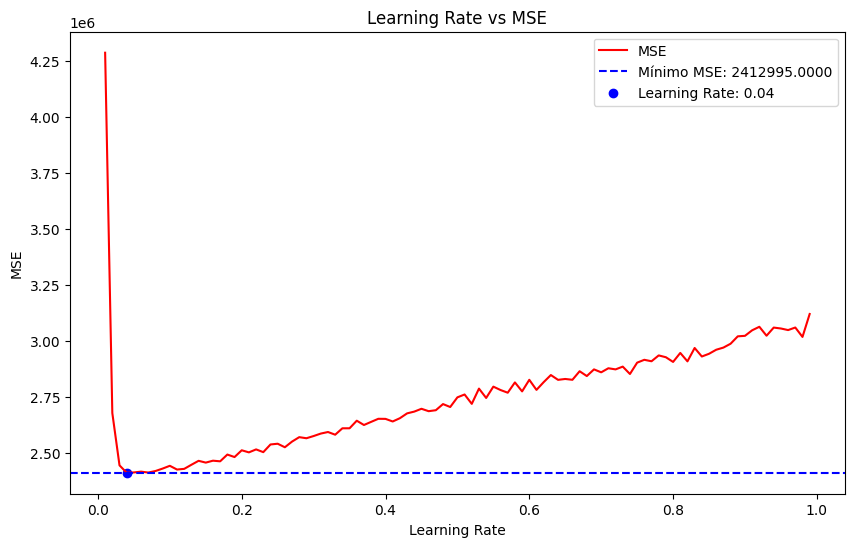

In [38]:
# Celda 7
# Calibrar el modelo XGBoost usando el parametro learning rate
l_rate = np.arange(0.01, 1, 0.01)
MSE = []
for lr in l_rate:
    modelo_xgb = xgb.XGBRegressor(learning_rate=lr)
    modelo_xgb.fit(X_train, y_train)
    y_pred = modelo_xgb.predict(X_test)
    MSE.append(mean_squared_error(y_test, y_pred))

# Encontrar el valor de l_rate que produce el mínimo valor de MSE
min_mse = min(MSE)
min_mse_lr = l_rate[MSE.index(min_mse)]

# Generación de gráfico para visualizar el comportamiento del MSE en función del learning rate
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(l_rate, MSE, 'r-', label='MSE')
plt.axhline(y=min_mse, color='b', linestyle='--', label=f'Mínimo MSE: {min_mse:.4f}')
plt.scatter(min_mse_lr, min_mse, color='blue', label=f'Learning Rate: {min_mse_lr:.2f}')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Learning Rate vs MSE')
plt.legend()
plt.show()

In [ ]:
# Calcular métricas del modelo con el learning rate óptimo
modelo_xgb_lr = xgb.XGBRegressor(learning_rate=min_mse_lr)
modelo_xgb_lr.fit(X_train, y_train)
y_pred = modelo_xgb_lr.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 2412995.0
RMSE: 1553.3817946660763
MAE: 1140.2301025390625
R2: 0.8422481417655945


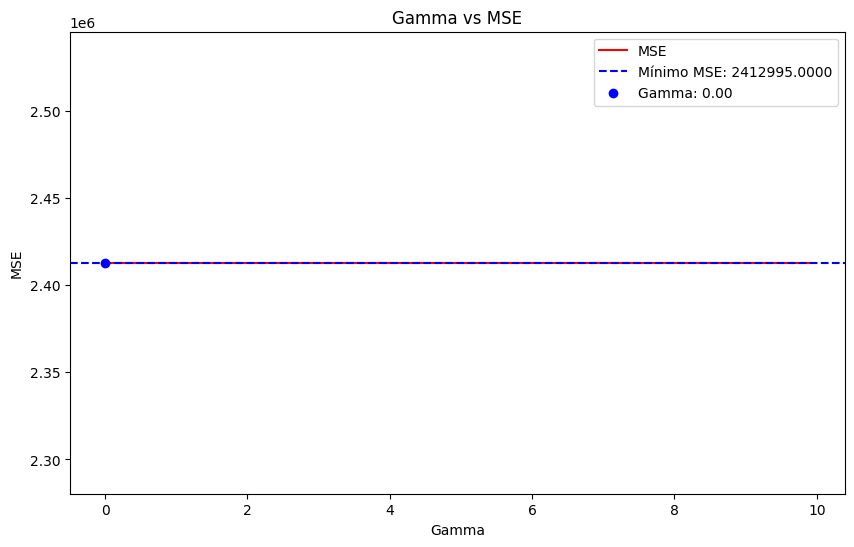

In [53]:
# Calibrar el modelo XGBoost usando el parametro gamma
gamma = np.arange(0, 10, 0.1)
MSE = []
for g in gamma:
    modelo_xgb = xgb.XGBRegressor(learning_rate=0.04, gamma=g)
    modelo_xgb.fit(X_train, y_train)
    y_pred = modelo_xgb.predict(X_test)
    MSE.append(mean_squared_error(y_test, y_pred))

# Encontrar el valor de gamma que produce el mínimo valor de MSE
min_mse = min(MSE)
min_mse_g = gamma[MSE.index(min_mse)]

# Generar gráfico para visualizar el comportamiento del MSE en función de gamma
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(gamma, MSE, 'r-', label='MSE')
plt.axhline(y=min_mse, color='b', linestyle='--', label=f'Mínimo MSE: {min_mse:.4f}')
plt.scatter(min_mse_g, min_mse, color='blue', label=f'Gamma: {min_mse_g:.2f}')
plt.xlabel('Gamma')
plt.ylabel('MSE')
plt.title('Gamma vs MSE')
plt.legend()
plt.show()

In [ ]:
# Calcular métricas del modelo con el gamma óptimo
modelo_xgb_lr_g = xgb.XGBRegressor(learning_rate=min_mse_lr, gamma=min_mse_g)
modelo_xgb_lr_g.fit(X_train, y_train)
y_pred = modelo_xgb_lr_g.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 2412995.0
RMSE: 1553.3817946660763
MAE: 1140.2301025390625
R2: 0.8422481417655945


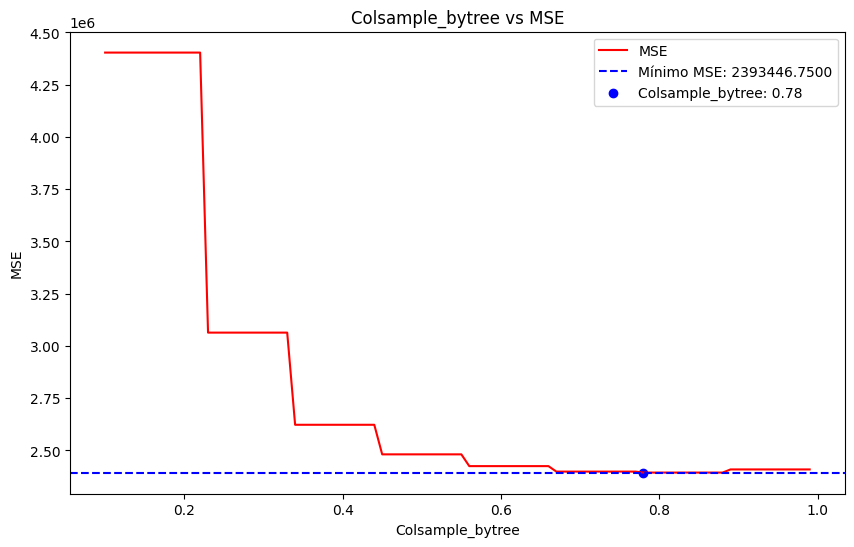

In [40]:
# Calibrar el modelo XGBoost usando el parametro colsample_bytree
colsample_bytree = np.arange(0.1, 1, 0.01)
MSE = []
for c in colsample_bytree:
    modelo_xgb = xgb.XGBRegressor(learning_rate=0.04, gamma=0, colsample_bytree=c)
    modelo_xgb.fit(X_train, y_train)
    y_pred = modelo_xgb.predict(X_test)
    MSE.append(mean_squared_error(y_test, y_pred))

# Encontrar valor de colsample_bytree que produce el mínimo valor de MSE
min_mse = min(MSE)
min_mse_c = colsample_bytree[MSE.index(min_mse)]

# Generar gráfico para visualizar el comportamiento del MSE en función de colsample_bytree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(colsample_bytree, MSE, 'r-', label='MSE')
plt.axhline(y=min_mse, color='b', linestyle='--', label=f'Mínimo MSE: {min_mse:.4f}')
plt.scatter(min_mse_c, min_mse, color='blue', label=f'Colsample_bytree: {min_mse_c:.2f}')
plt.xlabel('Colsample_bytree')
plt.ylabel('MSE')
plt.title('Colsample_bytree vs MSE')
plt.legend()
plt.show()

In [ ]:
# Calcular métricas del modelo con el colsample_bytree óptimo
modelo_xgb_lr_g_c = xgb.XGBRegressor(learning_rate=min_mse_lr, gamma=min_mse_g, colsample_bytree=min_mse_c)
modelo_xgb_lr_g_c.fit(X_train, y_train)
y_pred = modelo_xgb_lr_g_c.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 2393446.75
RMSE: 1547.0768403670195
MAE: 1137.3607177734375
R2: 0.8435261249542236


In [ ]:
# Comparación de modelos
modelos = {
    'Base': modelo_xgb_base,
    'Best_lr': modelo_xgb_lr,
    'Best_lr_g': modelo_xgb_lr_g,
    'Best_lr_g_c': modelo_xgb_lr_g_c
}

resultados = []

# Recolección de métricas para cada modelo
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    resultados.append({
        'Modelo': nombre,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# Creación de DataFrame para visualizar resultados
import pandas as pd

df_resultados = pd.DataFrame(resultados)
df_resultados.set_index('Modelo', inplace=True)
df_resultados

,MSE,RMSE,MAE,R2
Modelo,,,,
Base,2576781.00,1605.235497,1185.227295,0.831540
Best_lr,2412995.00,1553.381795,1140.230103,0.842248
Best_lr_g,2412995.00,1553.381795,1140.230103,0.842248
Best_lr_g_c,2393446.75,1547.076840,1137.360718,0.843526


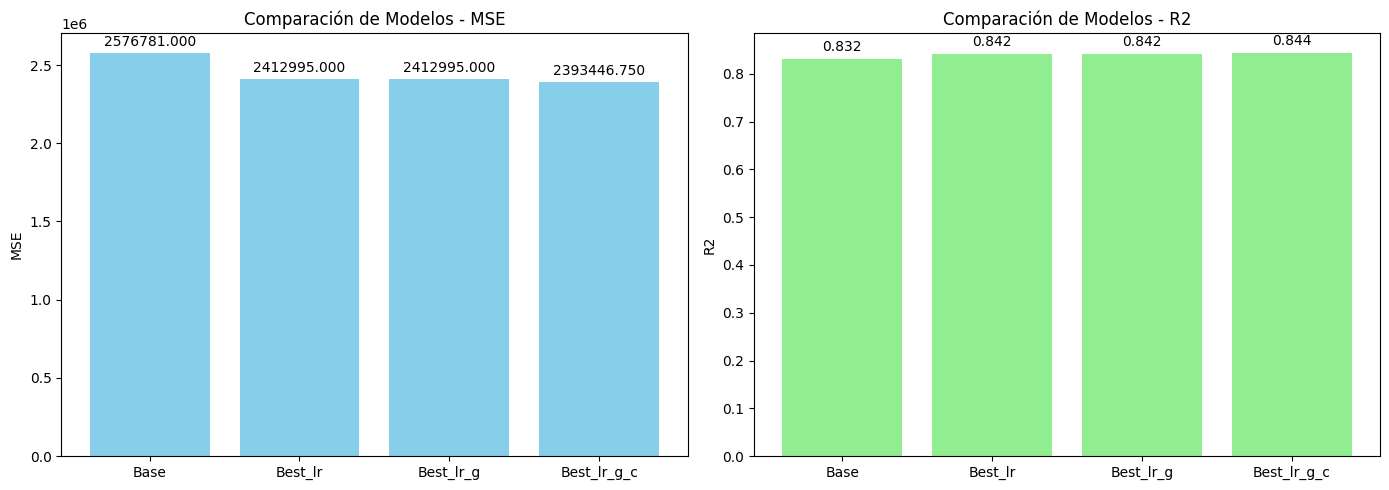

In [46]:
# Obtener los nombres de los modelos para las etiquetas del eje x
modelos = df_resultados.index

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graficar MSE
axes[0].bar(modelos, df_resultados['MSE'], color='skyblue')
axes[0].set_title('Comparación de Modelos - MSE')
axes[0].set_ylabel('MSE')
axes[0].set_xticklabels(modelos)

# Añadir etiquetas con el valor encima de cada barra
for i, val in enumerate(df_resultados['MSE']):
    axes[0].text(i, val + val*0.01, f"{val:.3f}", ha='center', va='bottom')

# Graficar R2
axes[1].bar(modelos, df_resultados['R2'], color='lightgreen')
axes[1].set_title('Comparación de Modelos - R2')
axes[1].set_ylabel('R2')
axes[1].set_xticklabels(modelos)

# Etiquetas de R2
for i, val in enumerate(df_resultados['R2']):
    axes[1].text(i, val + 0.01, f"{val:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Los tres modelos generados en cada paso de la calibración obtuvieron un cambio significativo en las metricas de desempeño comparados con el modelo base.
* El modelo con la calibración del `learning rate` genera un cambio significativo en los resultado comparado con el modelo base.
* En este caso, el parametro `gamma` no afecta el MSE del modelo, este parametro define el umbral  minimo de ganancia que debe producir una división para que el algoritmo decida realizarla. En este caso parece ser que todas las particiones generadas logran ganancias mas altas que los valores en el rango de busqueda de gamma, que para este caso fué [0.1 - 10] y por esta razón no se genera ninguna "poda" porque estos valores de gamma no generar ninguna restricción real para las particiones del algoritmo.
* El modelo con la calibración de `colsample_bytree` obtiene una ligera mejora tanto en el MSE como en el R2.
* La calibración se ejecuto en serie, es decir, primero se calibro para `learning rate`, luego para `gamma`, y finalmente para `colsample_bytree`. Esto se hace asumiendo que el o los parametros calibrados en la etapa anterior siguen siendo el o los mejores parametros aun cuando se modifica el siguiente parametro.
* Se sabe, que lo asumido en el punto anterior no es necesariamente cierto y que por tal motivo la busqueda de hiper-parametros debe hacerse en conjunto.

### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 8
